In [1]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
telemetry=pd.read_csv("/Users/nihaalnadaf/Downloads/archive/PdM_telemetry.csv")
machines=pd.read_csv("/Users/nihaalnadaf/Downloads/archive/PdM_machines.csv")
maint=pd.read_csv("/Users/nihaalnadaf/Downloads/archive/PdM_maint.csv")
failures=  pd.read_csv("/Users/nihaalnadaf/Downloads/archive/PdM_failures.csv")
errors=pd.read_csv("/Users/nihaalnadaf/Downloads/archive/PdM_errors.csv")

In [3]:
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")

errors['datetime'] = pd.to_datetime(errors['datetime'], format="%Y-%m-%d %H:%M:%S")
errors['errorID'] = errors['errorID'].astype('category')

maint['datetime'] = pd.to_datetime(maint['datetime'], format="%Y-%m-%d %H:%M:%S")
maint['comp'] = maint['comp'].astype('category')

machines['model'] = machines['model'].astype('category')

failures['datetime'] = pd.to_datetime(failures['datetime'], format="%Y-%m-%d %H:%M:%S")
failures['failure'] = failures['failure'].astype('category')

## FE on telemetry

In [5]:
# resampleing on the basis of min values for 3h duration 
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                        values=col).resample('3h', closed='left', label='right').min().unstack())

telemetry_min_3h = pd.concat(temp, axis=1)
telemetry_min_3h.columns = [i + '_min_3h' for i in fields]
telemetry_min_3h.reset_index(inplace=True)

telemetry_min_3h.head()

,machineID,datetime,volt_min_3h,rotate_min_3h,pressure_min_3h,vibration_min_3h
0,1,2015-01-01 09:00:00,162.879223,402.747490,75.237905,34.178847
1,1,2015-01-01 12:00:00,157.610021,346.149335,95.927042,25.990511
2,1,2015-01-01 15:00:00,156.556031,398.648781,101.001083,35.482009
3,1,2015-01-01 18:00:00,160.263954,382.483543,96.480976,38.543681
4,1,2015-01-01 21:00:00,153.353492,402.461187,86.012440,39.739883


In [6]:
# resampleing on the basis of max values for 3h duration 
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                        values=col).resample('3h', closed='left', label='right').max().unstack())

telemetry_max_3h = pd.concat(temp, axis=1)
telemetry_max_3h.columns = [i + '_max_3h' for i in fields]
telemetry_max_3h.reset_index(inplace=True)

telemetry_max_3h.head()

,machineID,datetime,volt_max_3h,rotate_max_3h,pressure_max_3h,vibration_max_3h
0,1,2015-01-01 09:00:00,176.217853,527.349825,113.077935,45.087686
1,1,2015-01-01 12:00:00,172.504839,435.376873,111.886648,41.122144
2,1,2015-01-01 15:00:00,175.324524,499.071623,111.755684,45.482287
3,1,2015-01-01 18:00:00,169.218423,460.850670,104.848230,42.675800
4,1,2015-01-01 21:00:00,182.739113,490.672921,93.484954,44.108554


In [7]:
# Merge columns of feature sets created earlier
telemetry_feat = pd.concat([telemetry_min_3h,
                            telemetry_max_3h.iloc[:, 2:6]], axis=1).dropna()

telemetry_feat.head()


,machineID,datetime,volt_min_3h,rotate_min_3h,pressure_min_3h,vibration_min_3h,volt_max_3h,rotate_max_3h,pressure_max_3h,vibration_max_3h
0,1,2015-01-01 09:00:00,162.879223,402.747490,75.237905,34.178847,176.217853,527.349825,113.077935,45.087686
1,1,2015-01-01 12:00:00,157.610021,346.149335,95.927042,25.990511,172.504839,435.376873,111.886648,41.122144
2,1,2015-01-01 15:00:00,156.556031,398.648781,101.001083,35.482009,175.324524,499.071623,111.755684,45.482287
3,1,2015-01-01 18:00:00,160.263954,382.483543,96.480976,38.543681,169.218423,460.850670,104.848230,42.675800
4,1,2015-01-01 21:00:00,153.353492,402.461187,86.012440,39.739883,182.739113,490.672921,93.484954,44.108554


In [8]:
telemetry_feat.describe()

,machineID,datetime,volt_min_3h,rotate_min_3h,pressure_min_3h,vibration_min_3h,volt_max_3h,rotate_max_3h,pressure_max_3h,vibration_max_3h
count,292100.000000,292100,292100.000000,292100.000000,292100.000000,292100.000000,292100.000000,292100.000000,292100.000000,292100.000000
mean,50.500000,2015-07-02 20:59:59.999999744,158.083149,404.146613,92.384876,36.149107,183.473398,489.026431,109.348395,44.627644
min,1.000000,2015-01-01 09:00:00,97.333604,138.432075,51.237106,14.877054,134.008631,237.641009,75.559302,28.581727
25%,25.750000,2015-04-02 15:00:00,150.370836,379.505260,86.862827,33.457643,175.270539,463.319490,103.502795,41.787201
50%,50.500000,2015-07-02 21:00:00,158.172629,406.891158,92.118675,36.088473,182.769923,489.161104,108.505756,44.291338
75%,75.250000,2015-10-02 03:00:00,165.846384,432.062323,97.281361,38.667734,190.895306,515.375351,114.007202,47.039826
max,100.000000,2016-01-01 09:00:00,235.726785,565.962115,160.026994,68.001841,255.124717,695.020984,185.951998,76.791072
std,28.866119,NaN,11.878952,40.828783,8.783319,4.210114,11.909021,40.802190,8.863881,4.220441


## FE on errors

In [10]:
error_count = pd.get_dummies(errors.set_index('datetime')).astype(int).reset_index()
error_count.columns = ['datetime', 'machineID', 'error1', 'error2', 'error3', 'error4', 'error5']

# Combine errors for a given machine in a given hour
error_count = error_count.groupby(['machineID', 'datetime']).sum().reset_index()
error_count.head()

,machineID,datetime,error1,error2,error3,error4,error5
0,1,2015-01-03 07:00:00,1,0,0,0,0
1,1,2015-01-03 20:00:00,0,0,1,0,0
2,1,2015-01-04 06:00:00,0,0,0,0,1
3,1,2015-01-10 15:00:00,0,0,0,1,0
4,1,2015-01-22 10:00:00,0,0,0,1,0


In [11]:
error_count=telemetry[["datetime","machineID"]].merge(error_count,on=["datetime","machineID"],how="left").fillna(0)

In [12]:
error_count

,datetime,machineID,error1,error2,error3,error4,error5
0,2015-01-01 06:00:00,1,0.0,0.0,0.0,0.0,0.0
1,2015-01-01 07:00:00,1,0.0,0.0,0.0,0.0,0.0
2,2015-01-01 08:00:00,1,0.0,0.0,0.0,0.0,0.0
3,2015-01-01 09:00:00,1,0.0,0.0,0.0,0.0,0.0
4,2015-01-01 10:00:00,1,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
876095,2016-01-01 02:00:00,100,0.0,0.0,0.0,0.0,0.0
876096,2016-01-01 03:00:00,100,0.0,0.0,0.0,0.0,0.0
876097,2016-01-01 04:00:00,100,0.0,0.0,0.0,0.0,0.0
876098,2016-01-01 05:00:00,100,0.0,0.0,0.0,0.0,0.0


In [13]:
error_count.describe()

,datetime,machineID,error1,error2,error3,error4,error5
count,876100,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,2015-07-02 18:00:00,50.500000,0.001153,0.001128,0.000957,0.000830,0.000406
min,2015-01-01 06:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015-04-02 12:00:00,25.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015-07-02 18:00:00,50.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2015-10-02 00:00:00,75.250000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2016-01-01 06:00:00,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,28.866087,0.033934,0.033563,0.030913,0.028795,0.020154


Finally, we can compute the total number of errors of each type over the last 24 hours, for timepoints taken every 3 hours:

In [15]:
temp = []
fields = ['error1','error2','error3','error4','error5']
for col in fields:
    temp.append(pd.pivot_table(error_count,
                                               index='datetime',
                                               columns='machineID',
                                         values=col).rolling(window=24).sum().resample('3h', 
                                                    closed='left', label='right').first().unstack())


error_count = pd.concat(temp, axis=1)
error_count.columns = [i + 'count' for i in fields]
# error_count.reset_index(inplace=True)#To be activate
error_count = error_count.dropna()
error_count.head()

error1count  error2count  error3count  \
machineID datetime                                                     
1         2015-01-02 06:00:00          0.0          0.0          0.0   
          2015-01-02 09:00:00          0.0          0.0          0.0   
          2015-01-02 12:00:00          0.0          0.0          0.0   
          2015-01-02 15:00:00          0.0          0.0          0.0   
          2015-01-02 18:00:00          0.0          0.0          0.0   

                               error4count  error5count  
machineID datetime                                       
1         2015-01-02 06:00:00          0.0          0.0  
          2015-01-02 09:00:00          0.0          0.0  
          2015-01-02 12:00:00          0.0          0.0  
          2015-01-02 15:00:00          0.0          0.0  
          2015-01-02 18:00:00          0.0          0.0

In [16]:
error_count.describe()

,error1count,error2count,error3count,error4count,error5count
count,291400.000000,291400.000000,291400.000000,291400.000000,291400.000000
mean,0.027649,0.027069,0.022907,0.019904,0.009753
std,0.166273,0.164429,0.151453,0.140820,0.098797
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000


### Count nos of Days Since Last Replacement of component from Maintenance data



In [18]:
import numpy as np
from tqdm.notebook import tqdm_notebook

# Create a column for each error type
comp_rep = pd.get_dummies(maint.set_index('datetime')).reset_index()
comp_rep.columns = ['datetime', 'machineID', 'comp1', 'comp2', 'comp3', 'comp4']

# Combine repairs for a given machine in a given hour
comp_rep = comp_rep.groupby(['machineID', 'datetime']).sum().reset_index()

# Add timepoints where no components were replaced
comp_rep = telemetry[['datetime', 'machineID']].merge(comp_rep,
                                                    on=['datetime', 'machineID'],
                                     how='outer').fillna(0).sort_values(by=['machineID', 'datetime'])


components = ['comp1', 'comp2', 'comp3', 'comp4']
for comp in tqdm_notebook(components):
    # Convert indicator to most recent date of component change
    comp_rep.loc[comp_rep[comp] < 1, comp] = None
    comp_rep.loc[-comp_rep[comp].isnull(), comp] = comp_rep.loc[-comp_rep[comp].isnull(),'datetime']
    
    # Forward-fill the most-recent date of component change
    comp_rep[comp] = comp_rep[comp].fillna(method='ffill')

# Remove dates in 2014 (may have NaN or future component change dates)    
comp_rep = comp_rep.loc[comp_rep['datetime'] > pd.to_datetime('2015-01-01')]

# Replace dates of most recent component change with days since most recent component change
for comp in tqdm_notebook(components):
    comp_rep[comp] = (comp_rep['datetime'] - comp_rep[comp]) / np.timedelta64(1, 'D')
    
comp_rep.describe()

  0%|          | 0/4 [00:00<?, ?it/s]

/var/folders/qn/kq8sg40148x2sxk_3k418fmh0000gn/T/ipykernel_9907/564300247.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<DatetimeArray>
['2014-12-13 06:00:00', '2015-01-05 06:00:00', '2015-01-20 06:00:00',
 '2015-03-06 06:00:00', '2015-03-21 06:00:00', '2015-06-19 06:00:00',
 '2015-07-19 06:00:00', '2015-08-03 06:00:00', '2015-09-02 06:00:00',
 '2015-10-02 06:00:00',
 ...
 '2014-09-14 06:00:00', '2015-02-12 06:00:00', '2015-03-14 06:00:00',
 '2015-03-29 06:00:00', '2015-04-13 06:00:00', '2015-04-28 06:00:00',
 '2015-07-27 06:00:00', '2015-09-10 06:00:00', '2015-09-25 06:00:00',
 '2015-10-10 06:00:00']
Length: 804, dtype: datetime64[ns]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  comp_rep.loc[-comp_rep[comp].isnull(), comp] = comp_rep.loc[-comp_rep[comp].isnull(),'datetime']
/var/folders/qn/kq8sg40148x2sxk_3k418fmh0000gn/T/ipykernel_9907/564300247.py:

  0%|          | 0/4 [00:00<?, ?it/s]

,datetime,machineID,comp1,comp2,comp3,comp4
count,876100,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,2015-07-02 18:00:00,50.500000,53.525185,51.540806,52.725962,53.834191
min,2015-01-01 06:00:00,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2015-04-02 12:00:00,25.750000,13.291667,12.125000,13.125000,13.000000
50%,2015-07-02 18:00:00,50.500000,32.791667,29.666667,32.291667,32.500000
75%,2015-10-02 00:00:00,75.250000,68.708333,66.541667,67.333333,70.458333
max,2016-01-01 06:00:00,100.000000,491.958333,348.958333,370.958333,394.958333
std,NaN,28.866087,62.491679,59.269254,58.873114,59.707978


In [19]:
comp_rep.sort_values(by=['machineID', 'datetime']).head()

,datetime,machineID,comp1,comp2,comp3,comp4
365,2015-01-01 06:00:00,1,19.000000,214.000000,154.000000,169.000000
465,2015-01-01 07:00:00,1,19.041667,214.041667,154.041667,169.041667
565,2015-01-01 08:00:00,1,19.083333,214.083333,154.083333,169.083333
665,2015-01-01 09:00:00,1,19.125000,214.125000,154.125000,169.125000
765,2015-01-01 10:00:00,1,19.166667,214.166667,154.166667,169.166667


**merging all feature data into final dataset**

In [21]:
final_feat = telemetry_feat.merge(error_count, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(comp_rep, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(machines, on=['machineID'], how='left')

print(final_feat.head())
final_feat.describe()

   machineID            datetime  volt_min_3h  rotate_min_3h  pressure_min_3h  \
0          1 2015-01-01 09:00:00   162.879223     402.747490        75.237905   
1          1 2015-01-01 12:00:00   157.610021     346.149335        95.927042   
2          1 2015-01-01 15:00:00   156.556031     398.648781       101.001083   
3          1 2015-01-01 18:00:00   160.263954     382.483543        96.480976   
4          1 2015-01-01 21:00:00   153.353492     402.461187        86.012440   

   vibration_min_3h  volt_max_3h  rotate_max_3h  pressure_max_3h  \
0         34.178847   176.217853     527.349825       113.077935   
1         25.990511   172.504839     435.376873       111.886648   
2         35.482009   175.324524     499.071623       111.755684   
3         38.543681   169.218423     460.850670       104.848230   
4         39.739883   182.739113     490.672921        93.484954   

   vibration_max_3h  ...  error2count  error3count  error4count  error5count  \
0         45.087686  ...

,machineID,datetime,volt_min_3h,rotate_min_3h,pressure_min_3h,vibration_min_3h,volt_max_3h,rotate_max_3h,pressure_max_3h,vibration_max_3h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,age
count,292100.000000,292100,292100.000000,292100.000000,292100.000000,292100.000000,292100.000000,292100.000000,292100.000000,292100.000000,291400.000000,291400.000000,291400.000000,291400.000000,291400.000000,292000.000000,292000.000000,292000.000000,292000.000000,292100.000000
mean,50.500000,2015-07-02 20:59:59.999999744,158.083149,404.146613,92.384876,36.149107,183.473398,489.026431,109.348395,44.627644,0.027649,0.027069,0.022907,0.019904,0.009753,53.464473,51.475866,52.660493,53.769068,11.330000
min,1.000000,2015-01-01 09:00:00,97.333604,138.432075,51.237106,14.877054,134.008631,237.641009,75.559302,28.581727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,2015-04-02 15:00:00,150.370836,379.505260,86.862827,33.457643,175.270539,463.319490,103.502795,41.787201,0.000000,0.000000,0.000000,0.000000,0.000000,13.250000,12.125000,13.125000,13.000000,6.750000
50%,50.500000,2015-07-02 21:00:00,158.172629,406.891158,92.118675,36.088473,182.769923,489.161104,108.505756,44.291338,0.000000,0.000000,0.000000,0.000000,0.000000,32.750000,29.625000,32.250000,32.500000,12.000000
75%,75.250000,2015-10-02 03:00:00,165.846384,432.062323,97.281361,38.667734,190.895306,515.375351,114.007202,47.039826,0.000000,0.000000,0.000000,0.000000,0.000000,68.625000,66.500000,67.250000,70.375000,16.000000
max,100.000000,2016-01-01 09:00:00,235.726785,565.962115,160.026994,68.001841,255.124717,695.020984,185.951998,76.791072,2.000000,2.000000,2.000000,2.000000,2.000000,491.875000,348.875000,370.875000,394.875000,20.000000
std,28.866119,NaN,11.878952,40.828783,8.783319,4.210114,11.909021,40.802190,8.863881,4.220441,0.166273,0.164429,0.151453,0.140820,0.098797,62.479594,59.251179,58.856793,59.692723,5.827625


### Label Construction

In [23]:
labeled_features = final_feat.merge(failures, on=['datetime', 'machineID'], how='left')
labeled_features = labeled_features.fillna(method='bfill', limit=7) # fill backward up to 24h
labeled_features['failure'] = labeled_features['failure'].astype('str')
labeled_features.replace({'nan': "none"}, inplace= True)


/var/folders/qn/kq8sg40148x2sxk_3k418fmh0000gn/T/ipykernel_9907/3568632144.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  labeled_features = labeled_features.fillna(method='bfill', limit=7) # fill backward up to 24h


In [46]:
labeled_features.tail(2)

,machineID,datetime,volt_min_3h,rotate_min_3h,pressure_min_3h,vibration_min_3h,volt_max_3h,rotate_max_3h,pressure_max_3h,vibration_max_3h,...,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
292140,100,2016-01-01 06:00:00,165.475310,413.77167,94.132837,35.123072,192.483414,447.816524,104.081073,48.314561,...,0.0,0.0,0.0,83.0,8.0,83.0,53.0,model4,5,none
292141,100,2016-01-01 09:00:00,171.336037,496.09687,79.095538,37.845245,171.336037,496.096870,79.095538,37.845245,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,model4,5,none


In [52]:
labeled_features.to_csv("/Users/nihaalnadaf/Downloads/archive/labeled_features.csv")

### modeling and training

In [55]:
labeled_features['datetime'] = pd.to_datetime(labeled_features['datetime'], format="%Y-%m-%d %H:%M:%S")

In [57]:
labeled_features.describe()

,machineID,datetime,volt_min_3h,rotate_min_3h,pressure_min_3h,vibration_min_3h,volt_max_3h,rotate_max_3h,pressure_max_3h,vibration_max_3h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,age
count,292142.000000,292142,292142.000000,292142.000000,292142.000000,292142.000000,292142.000000,292142.000000,292142.000000,292142.000000,292141.000000,292141.000000,292141.000000,292141.000000,292141.000000,292141.000000,292141.000000,292141.000000,292141.000000,292142.000000
mean,50.499127,2015-07-02 20:58:21.996974592,158.084403,404.139147,92.386747,36.149700,183.475185,489.018718,109.349751,44.628399,0.027815,0.027165,0.022989,0.019946,0.009834,53.479968,51.493181,52.679392,53.785669,11.330291
min,1.000000,2015-01-01 09:00:00,97.333604,138.432075,51.237106,14.877054,134.008631,237.641009,75.559302,28.581727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,2015-04-02 15:00:00,150.371360,379.495432,86.863417,33.457799,175.270908,463.308453,103.502904,41.787266,0.000000,0.000000,0.000000,0.000000,0.000000,13.250000,12.125000,13.125000,13.000000,7.000000
50%,50.000000,2015-07-02 21:00:00,158.173045,406.887098,92.119195,36.088670,182.771283,489.156358,108.506359,44.291599,0.000000,0.000000,0.000000,0.000000,0.000000,32.750000,29.625000,32.250000,32.500000,12.000000
75%,75.000000,2015-10-02 03:00:00,165.847573,432.060311,97.282725,38.668287,190.897064,515.371091,114.008179,47.040771,0.000000,0.000000,0.000000,0.000000,0.000000,68.625000,66.500000,67.250000,70.375000,16.000000
max,100.000000,2016-01-01 09:00:00,235.726785,565.962115,160.026994,68.001841,255.124717,695.020984,185.951998,76.791072,2.000000,2.000000,2.000000,2.000000,2.000000,491.875000,348.875000,370.875000,394.875000,20.000000
std,28.866542,NaN,11.880281,40.835358,8.786371,4.210870,11.911030,40.808835,8.866472,4.221378,0.166759,0.164698,0.151707,0.140960,0.099198,62.492435,59.265420,58.868352,59.704044,5.827542


In [59]:
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [61]:
X = labeled_features.drop(['datetime', 'machineID', 'failure'], axis=1)

In [69]:
X.head(2)

,volt_min_3h,rotate_min_3h,pressure_min_3h,vibration_min_3h,volt_max_3h,rotate_max_3h,pressure_max_3h,vibration_max_3h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age
0,162.879223,402.747490,75.237905,34.178847,176.217853,527.349825,113.077935,45.087686,0.0,0.0,0.0,0.0,0.0,19.125,214.125,154.125,169.125,model3,18
1,157.610021,346.149335,95.927042,25.990511,172.504839,435.376873,111.886648,41.122144,0.0,0.0,0.0,0.0,0.0,19.250,214.250,154.250,169.250,model3,18


In [71]:
X_final = pd.get_dummies(X)
X_final.head(2)

,volt_min_3h,rotate_min_3h,pressure_min_3h,vibration_min_3h,volt_max_3h,rotate_max_3h,pressure_max_3h,vibration_max_3h,error1count,error2count,...,error5count,comp1,comp2,comp3,comp4,age,model_model1,model_model2,model_model3,model_model4
0,162.879223,402.747490,75.237905,34.178847,176.217853,527.349825,113.077935,45.087686,0.0,0.0,...,0.0,19.125,214.125,154.125,169.125,18,False,False,True,False
1,157.610021,346.149335,95.927042,25.990511,172.504839,435.376873,111.886648,41.122144,0.0,0.0,...,0.0,19.250,214.250,154.250,169.250,18,False,False,True,False


In [73]:
X_final.describe()

,volt_min_3h,rotate_min_3h,pressure_min_3h,vibration_min_3h,volt_max_3h,rotate_max_3h,pressure_max_3h,vibration_max_3h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,age
count,292142.000000,292142.000000,292142.000000,292142.000000,292142.000000,292142.000000,292142.000000,292142.000000,292141.000000,292141.000000,292141.000000,292141.000000,292141.000000,292141.000000,292141.000000,292141.000000,292141.000000,292142.000000
mean,158.084403,404.139147,92.386747,36.149700,183.475185,489.018718,109.349751,44.628399,0.027815,0.027165,0.022989,0.019946,0.009834,53.479968,51.493181,52.679392,53.785669,11.330291
std,11.880281,40.835358,8.786371,4.210870,11.911030,40.808835,8.866472,4.221378,0.166759,0.164698,0.151707,0.140960,0.099198,62.492435,59.265420,58.868352,59.704044,5.827542
min,97.333604,138.432075,51.237106,14.877054,134.008631,237.641009,75.559302,28.581727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,150.371360,379.495432,86.863417,33.457799,175.270908,463.308453,103.502904,41.787266,0.000000,0.000000,0.000000,0.000000,0.000000,13.250000,12.125000,13.125000,13.000000,7.000000
50%,158.173045,406.887098,92.119195,36.088670,182.771283,489.156358,108.506359,44.291599,0.000000,0.000000,0.000000,0.000000,0.000000,32.750000,29.625000,32.250000,32.500000,12.000000
75%,165.847573,432.060311,97.282725,38.668287,190.897064,515.371091,114.008179,47.040771,0.000000,0.000000,0.000000,0.000000,0.000000,68.625000,66.500000,67.250000,70.375000,16.000000
max,235.726785,565.962115,160.026994,68.001841,255.124717,695.020984,185.951998,76.791072,2.000000,2.000000,2.000000,2.000000,2.000000,491.875000,348.875000,370.875000,394.875000,20.000000


In [75]:
X_final_train = X_final.values
X_final_train[1]

array([157.61002119306, 346.149335043074, 95.9270416939636,
       25.9905109982024, 172.504839196295, 435.376873016938,
       111.886648210168, 41.1221440884256, 0.0, 0.0, 0.0, 0.0, 0.0, 19.25,
       214.25, 154.25, 169.25, 18, False, False, True, False],
      dtype=object)

In [79]:
y_final=labeled_features['failure']
y_final.head(2)

0    none
1    none
Name: failure, dtype: object

In [81]:
y_final_train = y_final.values
y_final_train[1]

'none'

In [83]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
label_encoder = LabelEncoder()
y_final_train = label_encoder.fit_transform(y_final_train)


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_final_train, y_final_train,test_size=0.20, shuffle=False)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20, shuffle=False)

In [87]:
print('X_train Observations: %d' % (len(X_train)))
print('y_train Observations: %d' % (len(y_train)))

print('X_cv Observations: %d' % (len(X_cv)))
print('y_cv Observations: %d' % (len(y_cv)))

print('X_test Observations: %d' % (len(X_test)))
print('y_test Observations: %d' % (len(y_test)))

X_train Observations: 186970
y_train Observations: 186970
X_cv Observations: 46743
y_cv Observations: 46743
X_test Observations: 58429
y_test Observations: 58429


In [89]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    
    labels = ['comp1', 'comp2', 'comp3', 'comp4', 'none']
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

### Model xgb classifier

In [92]:
from xgboost import XGBClassifier

x_cfl=XGBClassifier()
x_cfl.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

-------------------- Confusion matrix --------------------


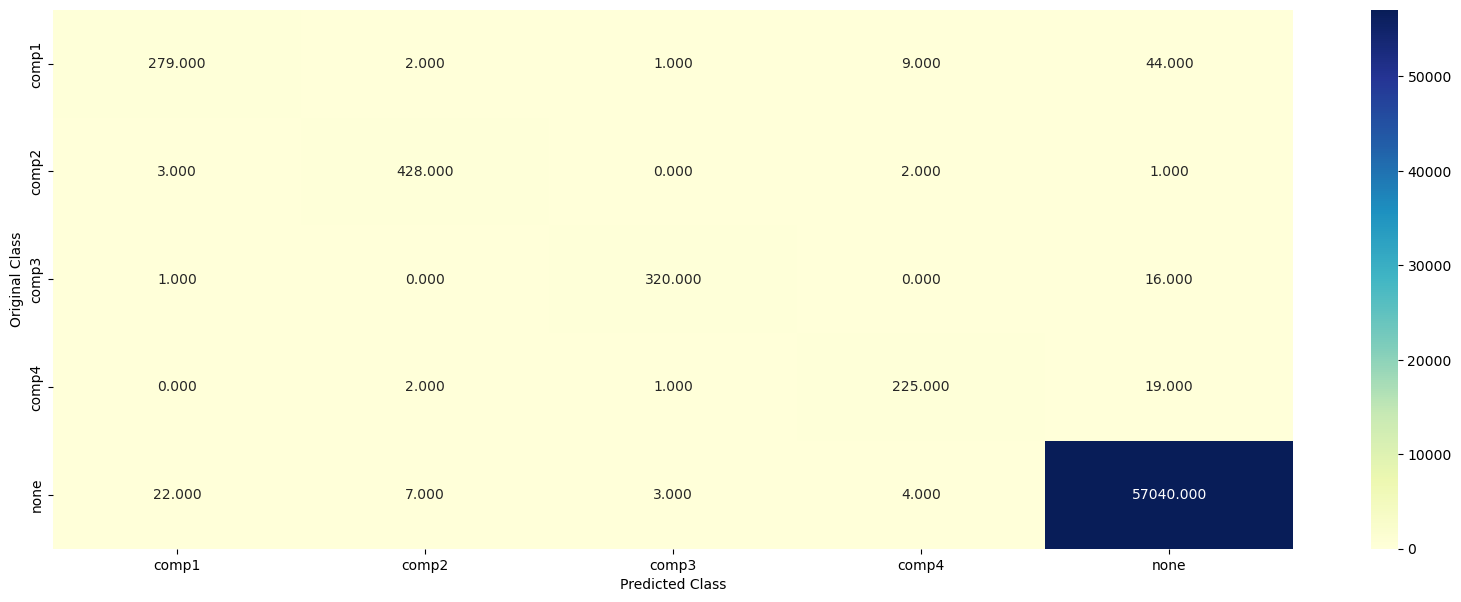

-------------------- Precision matrix (Columm Sum=1) --------------------


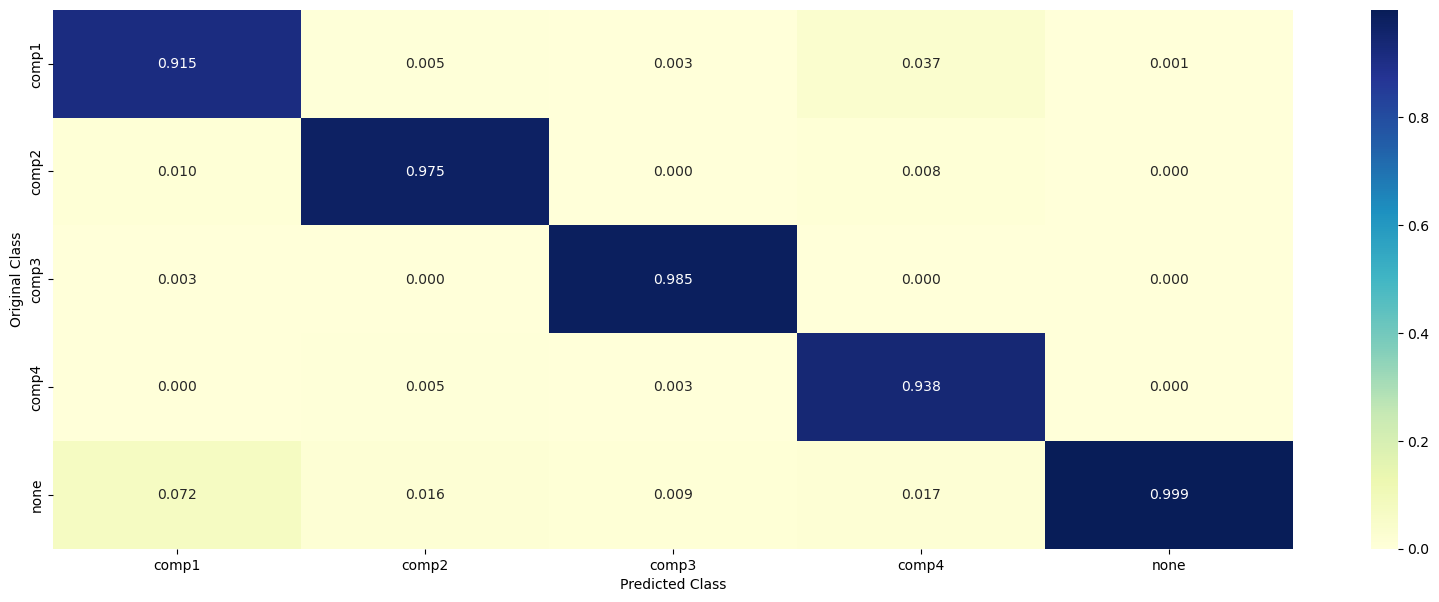

-------------------- Recall matrix (Row sum=1) --------------------


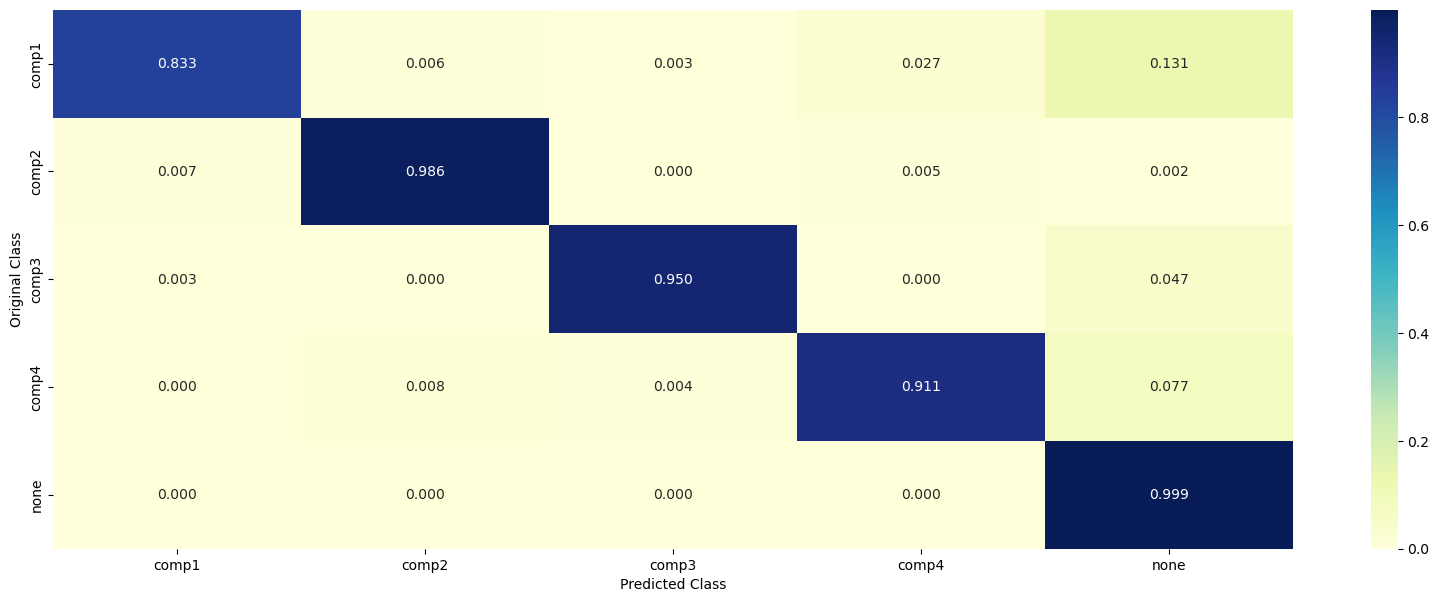

In [94]:
plot_confusion_matrix(y_test, x_cfl.predict(X_test))

In [96]:
from prettytable import PrettyTable

# Specify the Column Names
myTable = PrettyTable(["Model name (Recall score )", "comp1", "comp2", "comp3", 'comp4', 'none(no fail)'])

# Add rows

myTable.add_row(["Xgboost with available 19 nos of features", 
                 "0.206", "0.341", "0.705", "0.611", "1"])

myTable.add_row(["Xgboost with new 22 nos of features", 
                 "0.833", "0.986", "0.950", "0.911", "1"])


print(myTable)

+-------------------------------------------+-------+-------+-------+-------+---------------+
|         Model name (Recall score )        | comp1 | comp2 | comp3 | comp4 | none(no fail) |
+-------------------------------------------+-------+-------+-------+-------+---------------+
| Xgboost with available 19 nos of features | 0.206 | 0.341 | 0.705 | 0.611 |       1       |
|    Xgboost with new 22 nos of features    | 0.833 | 0.986 | 0.950 | 0.911 |       1       |
+-------------------------------------------+-------+-------+-------+-------+---------------+
